In [2]:
# Preamble
from astropy.table import Table, column, vstack
import numpy as np
import os
import pandas as pd

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
# better-looking plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0, 8)
plt.rcParams['font.size'] = 18
mpl.ticker.AutoLocator.default_params['nbins'] = 5
mpl.ticker.AutoLocator.default_params['prune'] = 'both'

mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True

import sys
sys.path.append('../../astro_codes/')

In [3]:
# Load the data
import pandas as pd
sparcfire_r = Table.read('../../sparcfire_directories/r/r.galaxy_matched.fits')
sparcfire_r_arcs = pd.read_csv('../../sparcfire_directories/r/r.galaxy_arcs.csv')

In [4]:
spotter_subjects = Table.read('spotter_subjects_matched.fits')
ok_N_class = spotter_subjects['total'] >= 3

In [5]:
# Load the saved np data:
P_array = np.load('np_metadata/P_array.npy')
L_array = np.load('np_metadata/L_array.npy')
mask_array = np.load('np_metadata/mask_array.npy')
chi_array = np.load('np_metadata/chi_array.npy')

In [6]:
from astroML.utils import completeness_contamination

def CC_check(array,truths,length_cuts=np.linspace(0,200,9)):
    truth_ = truths.ravel()
    array_ = array.ravel()
    checked_positive = truth_ == True
    checked_negative = truth_ == False
    completenesses = []
    contaminations = []
    efficiencies = []
    for L in length_cuts:
        predicted_positive = array_ >= L
        predicted_negative = array_ < L
        completeness, contamination = completeness_contamination(predicted_positive,
                                                                 checked_positive)
        efficiency = 1 - contamination
        completenesses.append(completeness)
        contaminations.append(contamination)
        efficiencies.append(efficiency)
    output_table = Table(np.array([length_cuts,completenesses,
                                  contaminations,efficiencies]).T,
                         names=('L','completeness','contamination','efficiency'))
    
    return output_table  

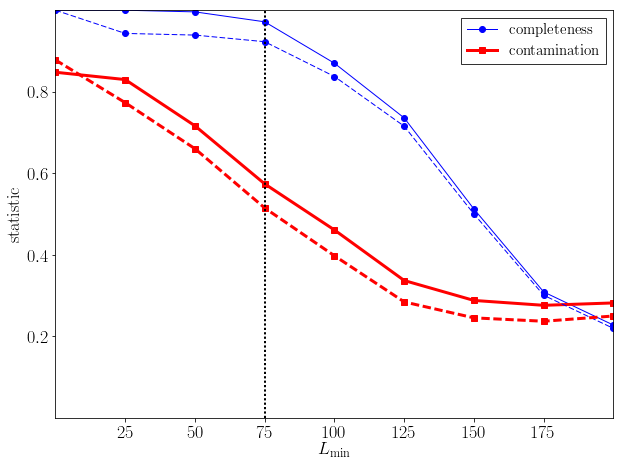

In [7]:
fig = plt.figure(figsize=(10,7.5))
ax = plt.subplot(111)


cc_table = CC_check(L_array,mask_array)

_ = ax.plot(cc_table['L'],cc_table['completeness'],
            color='b',lw=1,marker='o',label='completeness')
_ = ax.plot(cc_table['L'],cc_table['contamination'],
            color='r',marker='s',lw=3,label='contamination')

_ = ax.legend(fancybox=False,edgecolor='k',fontsize=15)

####### w. chirality mask #############
chirality_mask = chi_array == 1
L_array_chi_masked = L_array.copy()
L_array_chi_masked[chirality_mask == False] = 0

cc_table_chi = CC_check(L_array_chi_masked,mask_array)

_ = ax.plot(cc_table_chi['L'],cc_table_chi['completeness'],
            color='b',lw=1,marker='o',linestyle='dashed',
            label=None)
_ = ax.plot(cc_table_chi['L'],cc_table_chi['contamination'],
            color='r',marker='s',linestyle='dashed',lw=3,
            label=None)
##########################################


plt.sca(ax)
_ = plt.axvline(75,linestyle='dotted',color='k',lw=2)
_ = ax.set_xlabel('$L_\mathrm{min}$')
_ = ax.set_ylabel('statistic')
_ = ax.set_xlim(0,200)
_ = ax.set_ylim(0,1)

fig.savefig('../paper_figures/completeness_contamination_length_cut.pdf')

In [8]:
cc_table = CC_check(L_array,mask_array,np.linspace(0,150,151))
cc_table_chi = CC_check(L_array_chi_masked,mask_array,np.linspace(0,150,151))

In [14]:
print(cc_table[120:140])
print(cc_table_chi[120:140])

  L    completeness  contamination    efficiency  
----- -------------- -------------- --------------
120.0 0.772357723577 0.351535836177 0.648464163823
121.0 0.768292682927 0.346020761246 0.653979238754
122.0 0.760162601626 0.341549295775 0.658450704225
123.0 0.756097560976 0.335714285714 0.664285714286
124.0 0.756097560976 0.333333333333 0.666666666667
125.0 0.735772357724 0.336996336996 0.663003663004
126.0 0.723577235772 0.338289962825 0.661710037175
127.0 0.707317073171 0.338403041825 0.661596958175
128.0  0.70325203252 0.337164750958 0.662835249042
129.0  0.69512195122 0.339768339768 0.660231660232
130.0 0.678861788618 0.337301587302 0.662698412698
131.0 0.662601626016 0.342741935484 0.657258064516
132.0 0.658536585366  0.33606557377  0.66393442623
133.0 0.646341463415 0.331932773109 0.668067226891
134.0 0.638211382114 0.323275862069 0.676724137931
135.0 0.630081300813 0.320175438596 0.679824561404
136.0 0.617886178862 0.318385650224 0.681614349776
137.0 0.609756097561 0.32126696